# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:
# import libraries here
import warnings
warnings.simplefilter('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pandas as pd
pd.set_option('display.max_columns', None)

In [10]:
%pip install scipy

  Obtaining dependency information for scipy from https://files.pythonhosted.org/packages/81/d7/d2537d51efb692d0c411e64267ba349e7668d40f5bc73cefe78ccd650dcd/scipy-1.11.3-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.4 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.4 kB ? eta -:--:--
     ------------ ------------------------- 20.5/60.4 kB 108.9 kB/s eta 0:00:01
     ------------------- ------------------ 30.7/60.4 kB 130.4 kB/s eta 0:00:01
     ------------------------- ------------ 41.0/60.4 kB 163.4 kB/s eta 0:00:01
     -------------------------------------- 60.4/60.4 kB 213.5 kB/s eta 0:00:00
   ---------------------------------------- 0.0/44.1 MB ? eta -:--:--
   ---------------------------------------- 0.2/44.1 MB 3.5 MB/s eta 0:00:13
   ---------------------------------------- 0.3/44.1 MB 3.3 MB/s eta 0:00:14
    -----------------------------

In [2]:
import scipy.stats
from scipy.stats import spearmanr

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`

In [14]:
# your answer here

employee = pd.read_csv('Employee.csv', encoding='latin1')
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


In [41]:
employee.columns = [c.lower().replace('_', ' ') for c in employee.columns] #con esto ponemos todo en minusculas y reemplazamos las _ por espacio, son buenas practicas

#### What's the mean salary by department. 
##### Tip : There are 2 ways to do it - one way is with and the other way is without pivot tables. Do it both ways. 


In [42]:
salary_mean = employee.groupby("department")["salary"].mean()
salary_mean 


department
HR       45.00
IT       48.75
Sales    55.00
Name: salary, dtype: float64

In [43]:
# your answer 
pivot_table = employee.pivot_table(index="department", values= "salary", aggfunc = "mean")
pivot_table

,salary
department,
HR,45.00
IT,48.75
Sales,55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title

In [44]:
# your answer here

pivot_table2 = employee.pivot_table(index='title', columns='department', values='salary', aggfunc='mean')
pivot_table2


department,HR,IT,Sales
title,,,
VP,70.0,70.0,NaN
analyst,32.5,32.5,NaN
associate,NaN,60.0,55.0


#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [46]:
experience_years = employee.pivot_table(index="years", columns= "title", values="salary")
experience_years

title,VP,analyst,associate
years,,,
1,NaN,35.0,NaN
2,NaN,30.0,55.0
3,NaN,NaN,55.0
4,NaN,35.0,NaN
7,NaN,NaN,60.0
8,70.0,NaN,NaN


#### We want to know the information about the mean salary and number of employees in each department and for each job title

In [50]:
mean_salary_per_employees = employee.pivot_table(index="department", columns=("title"), values=("salary", "name"), aggfunc={'salary': 'mean', 'name': 'count'})
mean_salary_per_employees

name                   salary                  
title        VP analyst associate     VP analyst associate
department                                                
HR          1.0     2.0       NaN   70.0    32.5       NaN
IT          1.0     2.0       1.0   70.0    32.5      60.0
Sales       NaN     NaN       2.0    NaN     NaN      55.0

#### We want to know for each department and for each job title the Salary's median,minimum,maximum and standard deviation. Comment your results

In [52]:
salaries_med = employee.pivot_table(index="department", columns="title", values="salary", aggfunc={"salary": ["median", "min", "max", "std"]})
salaries_med

max                   median                     min          \
title         VP analyst associate     VP analyst associate    VP analyst   
department                                                                  
HR          70.0    35.0       NaN   70.0    32.5       NaN  70.0    30.0   
IT          70.0    35.0      60.0   70.0    32.5      60.0  70.0    30.0   
Sales        NaN     NaN      55.0    NaN     NaN      55.0   NaN     NaN   

                           std            
title      associate   analyst associate  
department                                
HR               NaN  3.535534       NaN  
IT              60.0  3.535534       NaN  
Sales           55.0       NaN       0.0

- En HR y IT el salario maximo es el mismo, al igual que de analista
- La Media de ambas es identica, asi como el minimo y la desviacion estandard
- En Ventas no hay desviacion estandard ya que los dos salarios son identicos 

#### Based on your comments, fill the missing values with an appropriate value

In [ ]:
# your answer here

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [53]:
dep_employees_salary = employee.pivot_table(index="department", values=["salary", "name"], aggfunc={"salary": "sum", "name": "count"}) #podemos quitar la columna, no es necesaria
dep_employees_salary

,name,salary
department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each Department and Title, we want to know the the total years of work experience and the mean salary

In [55]:
# your answer here
total_years = employee.pivot_table(index="department", columns="title", values= ["years", "salary"], aggfunc={"years": "sum", "salary": "mean"})
total_years

salary                   years                  
title          VP analyst associate    VP analyst associate
department                                                 
HR           70.0    32.5       NaN   8.0     6.0       NaN
IT           70.0    32.5      60.0   8.0     3.0       7.0
Sales         NaN     NaN      55.0   NaN     NaN       5.0

#### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table

#### * Hint: Write a custom function*

In [ ]:
# your answer here

In [ ]:
# your answer here

# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`

In [56]:
# your answer here
fitbit= pd.read_csv('Fitbit.csv', encoding='latin1')
fitbit

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,03-05-2016,3796,18588,14.13,16,599.000,275,49,79,236,377,33,18,410
363,04-05-2016,3525,16382,12.39,16,684.000,333,10,55,2075,406,21,8,427
364,05-05-2016,3649,21913,16.40,19,701.000,287,29,90,2249,280,35,15,315
365,06-05-2016,3539,19023,14.79,15,575.000,298,8,85,2112,370,42,22,412


In [61]:
fitbit.columns = [c.lower().replace('_', ' ') for c in fitbit.columns] #con esto ponemos todo en minusculas y reemplazamos las _ por espacio, son buenas practicas

#### Explore you dataset in terms of data types and descriptive statistics
#### *Hint: Use Pandas functions from previous lectures*

In [62]:
# your answer here
fitbit.describe()

,calorie burned,steps,distance,floors,minutes sedentary,minutes lightly active,minutes fairly active,minutes very active,activity calories,minutesofsleep,minutesofbeingawake,numberofawakings,lengthofrestinminutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


In [63]:
# your answer here
fitbit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    367 non-null    object 
 1   calorie burned          367 non-null    int64  
 2   steps                   367 non-null    int64  
 3   distance                367 non-null    float64
 4   floors                  367 non-null    int64  
 5   minutes sedentary       367 non-null    float64
 6   minutes lightly active  367 non-null    int64  
 7   minutes fairly active   367 non-null    int64  
 8   minutes very active     367 non-null    int64  
 9   activity calories       367 non-null    int64  
 10  minutesofsleep          367 non-null    int64  
 11  minutesofbeingawake     367 non-null    int64  
 12  numberofawakings        367 non-null    int64  
 13  lengthofrestinminutes   367 non-null    int64  
dtypes: float64(2), int64(11), object(1)
memory

#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [64]:
# your answer here
fitbit.corr(numeric_only=True, method="pearson")

,calorie burned,steps,distance,floors,minutes sedentary,minutes lightly active,minutes fairly active,minutes very active,activity calories,minutesofsleep,minutesofbeingawake,numberofawakings,lengthofrestinminutes
calorie burned,1.000000,0.255305,0.292790,0.130757,0.125353,0.209540,0.188256,0.197881,-0.130758,0.011485,0.041999,0.030490,0.017460
steps,0.255305,1.000000,0.779678,0.306511,0.076906,0.393010,0.303244,0.571452,-0.160568,0.130986,0.124846,0.106591,0.133405
distance,0.292790,0.779678,1.000000,0.382940,0.160632,0.455272,0.348113,0.759310,-0.246853,0.129442,0.130447,0.091095,0.134550
floors,0.130757,0.306511,0.382940,1.000000,0.057812,-0.085992,0.278408,0.399503,-0.155532,0.069464,0.064587,0.043459,0.075864
minutes sedentary,0.125353,0.076906,0.160632,0.057812,1.000000,0.217021,0.084137,0.105963,-0.161446,0.204242,0.200589,0.178387,0.208539
minutes lightly active,0.209540,0.393010,0.455272,-0.085992,0.217021,1.000000,0.014288,-0.034425,-0.219892,0.105048,0.096107,0.087150,0.105406
minutes fairly active,0.188256,0.303244,0.348113,0.278408,0.084137,0.014288,1.000000,0.337839,-0.204562,0.114950,0.104303,0.100498,0.123034
minutes very active,0.197881,0.571452,0.759310,0.399503,0.105963,-0.034425,0.337839,1.000000,-0.187309,0.108018,0.116559,0.099859,0.115641
activity calories,-0.130758,-0.160568,-0.246853,-0.155532,-0.161446,-0.219892,-0.204562,-0.187309,1.000000,-0.005804,0.010859,0.022757,-0.004992
minutesofsleep,0.011485,0.130986,0.129442,0.069464,0.204242,0.105048,0.114950,0.108018,-0.005804,1.000000,0.779595,0.780512,0.997184


In [65]:
correlation = fitbit["steps"].corr(fitbit["minutes very active"])
correlation 

0.5714518481062608

#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

In [66]:
# your answer here
import matplotlib.pyplot as plt

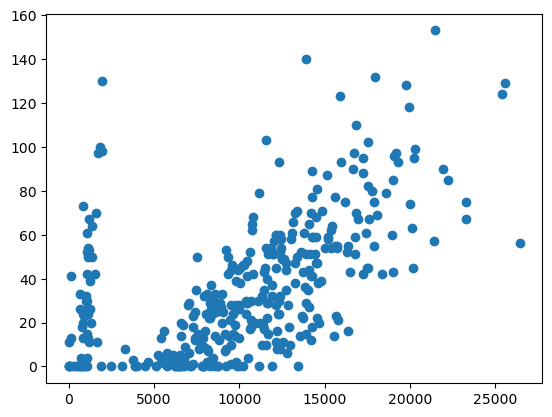

In [67]:
plt.scatter(x=fitbit['steps'], y=fitbit['minutes very active'])

#### What can you say about Minute Very Active and Steps? Write a comment below

In [ ]:
# your comment here
''' Tenemos una correlacion positiva moderada entre las variables Minute Very Active y Steps, 
cuanto más cerca esté el valor de 1 (positivo) o -1 (negativo), más fuerte es la correlación, en nuestro caso 0,57 es moderada.
'''

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [68]:
# your answer here
correlation2 = fitbit["steps"].corr(fitbit["minutes sedentary"])
correlation2

0.07690608062990091

#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

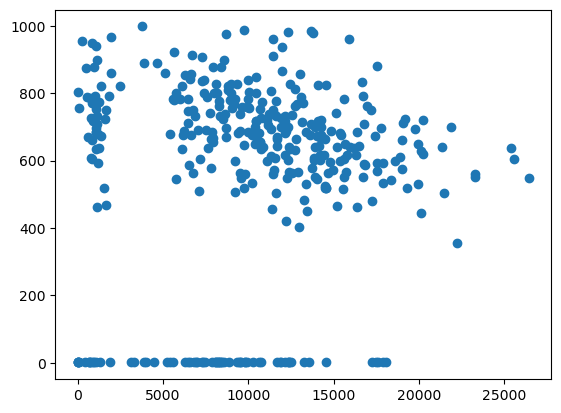

In [69]:
# your answer here
plt.scatter(x=fitbit['steps'], y=fitbit['minutes sedentary'])

In [ ]:
# Your comment here
'''Aqui vemos que hay una correlacion positiva, pero la fuerza de la correlacion es muy baja al ser nuestro valor 0,07'''

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [71]:
# your answer here
correlation3 = fitbit["steps"].corr(fitbit["minutesofsleep"])
correlation3

0.1309856595083638

#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

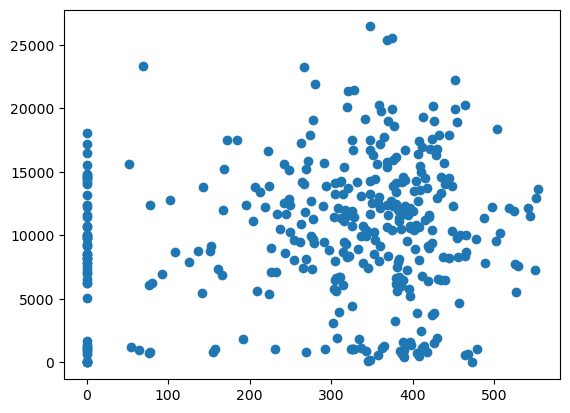

In [73]:
# your answer here
plt.scatter(x=fitbit['minutesofsleep'], y=fitbit['steps'])

In [ ]:
'''Aqui vemos que hay una correlacion positiva, pero la fuerza de la correlacion es baja al ser nuestro valor 0,13'''

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [81]:
# your answer here
column = ['calorie burned', 'steps', 'floors', 'minutes sedentary', 'minutes very active', 'minutesofsleep']
subset = fitbit[column]

In [79]:
cor_fit = subset.corr()
cor_fit

,calorie burned,steps,floors,minutes sedentary,minutes very active,minutesofsleep
calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
minutes sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
minutes very active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
minutesofsleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [82]:
# your answer here
cor_fit.sort_values(by='steps', ascending=False)

,calorie burned,steps,floors,minutes sedentary,minutes very active,minutesofsleep
steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
minutes very active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
minutesofsleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000
minutes sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242


# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`

In [22]:
# your answer here
time_grades= pd.read_csv('Time_Grades.csv', encoding='latin1')
time_grades

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9
5,Eva,5,3
6,Carlos,12,7
7,Pedro,6,5
8,Ana,18,9
9,Gervasio,7,3


In [23]:
time_grades.columns = [c.lower().replace('_', ' ') for c in time_grades.columns] #con esto ponemos todo en minusculas y reemplazamos las _ por espacio, son buenas practicas

#### Show visually the frequency distribution of the time_grades dataset.

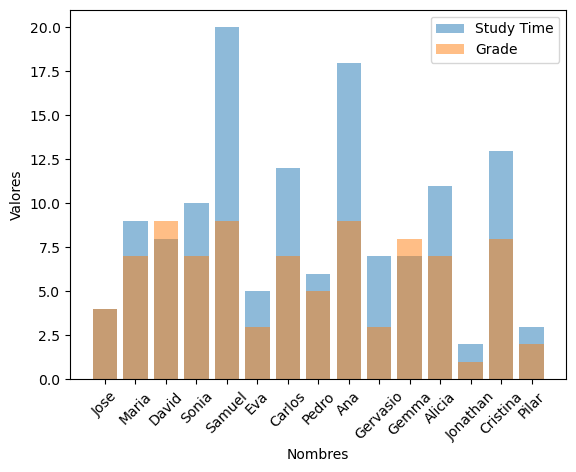

In [24]:
#defino mis columnas con sus valores para la grafica 
nombres = time_grades['name']
study_time = time_grades['study time']
grade = time_grades['grade']

# Creo un gráfico de barras
plt.bar(nombres, study_time, label='Study Time', alpha=0.5)
plt.bar(nombres, grade, label='Grade', alpha=0.5)

# Agrego etiquetas y leyendas
plt.xlabel('Nombres')
plt.ylabel('Valores')
plt.legend()

# Roto las etiquetas del eje x para que sean legibles
plt.xticks(rotation=45)

# Muestra el gráfico de barras
plt.show()

#### Is there a correaltion between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [25]:
# PEARSON
correlation = time_grades["study time"].corr(time_grades["grade"])
correlation 

0.7980456073578858

In [26]:
## SPEARMAN

correlation_S = time_grades["study time"].corr(time_grades["grade"], method = "spearman")
correlation_S

0.819658753036942

#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

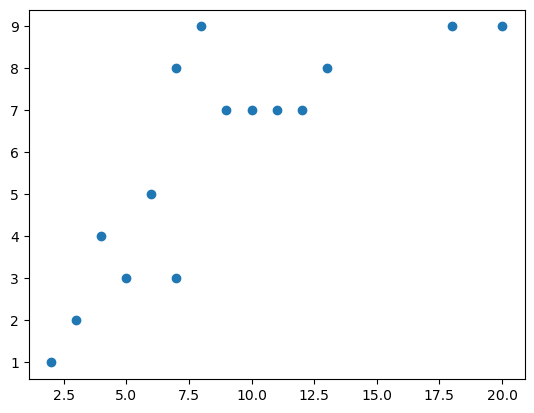

In [47]:
# your answer here
plt.scatter(x=time_grades['study time'], y=time_grades['grade'])

In [46]:
#your comment here

''' veo que a medida que una variable (study time) aumenta, 
la otra (grade) también tiende a aumentar, de todos modos en la visualizacion no se ven suficientes 
puntos para ver la correlacion, aunque en las dos formulas vemos que es clara'''

' veo que a medida que una variable (study time) aumenta, la otra (grade) también tiende a aumentar'

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [ ]:
#your comment here
'''  la correlación de Pearson es útil cuando deseas evaluar la relación lineal entre dos variables numéricas que siguen una distribución normal. 
La correlación de Spearman es más versátil y se utiliza cuando las variables pueden no seguir una relación lineal o cuando los datos 
no cumplen con los supuestos de normalidad. Además, la correlación de Spearman se basa en los rangos de los datos, 
lo que la hace menos sensible a los valores atípicos. La elección entre estos dos métodos depende de la naturaleza de los datos '''